# Regression analysis: 2 variables


###  Reference

- Book: "Estadistica Aplicada", *Julian de la Horra Navarro*.

In [1]:
%matplotlib inline
import numpy as np

### Sample average
$ \overline{x} = \frac{1}{n} \sum_{i=0}^{n} x_{i} $

### Sample Variance

$ \nu_{x} = \frac{1}{n} \sum_{i=0}^{n} (x_{i} - \overline{x})^2 $

### Sample Covariance

$ cov_{x,y} = \frac{1}{n} \sum_{i=0}^{n} (x_{i} - \overline{x}) (y_{i} - \overline{y}) $

### Linear Regression

$ y = a + b x $

$ a = \overline{y} - \frac{cov_{x,y}}{\nu_{x}} \overline{x}$

$ b = \frac{cov_{x,y}}{\nu_{x}} $

### Sample correlation coefficient

$ r = \frac{cov_{x,y}}{ \sqrt{\nu_{y} \nu_{x}} } $

### Varianza Residual = Error Cuadratrico Medio (ECM)

$ ECM =  \nu_{y} ( 1 - r^2 ) $

In [95]:
# data sample 1
X = np.array([21,21,33,21,27,35,25,37,25,18,21,37,45,27,18,35])
Y = np.array([5,6,6,8,6,7,5,8,7,4,7,9,10,5,5,8])

# data sample 2 
Y = np.array([50,90,30,90,91,95,95])
X = np.array([0.5,0.9,0.4,0.7,1.1,0.75,0.8])

In [96]:

def coefficients(X:np.array, Y:np.array)->(float, float):
    """
    Estimate regression line coefficents: y = a + b*x
    X -- independent variable.
    Y -- dependent variable.
    return -- coefficients (a, b)
    """
    # estimate coefficients
    a = np.mean(Y) - ( np.cov(X,Y)[0][1] / np.var(X) ) * np.mean(X)
    b = np.cov(X,Y)[0][1] / np.var(X)
    # return
    return (a, b)

def metrics(X:np.array, Y:np.array)->(float, float):
    """
    Estimate regression line metrics: correlation coefficient, residual variance (Mean Square Error)
    X -- independent variable.
    Y -- dependent variable.
    return -- coefficients (r, mse)
    """
    # correlation coefficient
    r = np.cov(X,Y)[0][1] / np.sqrt(np.var(X) * np.var(Y))
    # mean square error
    mse = np.var(Y) * ( 1 - r**2 )
    # return
    return r, mse

linear: r = 0.955 / mse = 52.310
log:    r = 1.044 / mse = -53.221
exp:    r = 0.948 / mse = 1.018
y = 105.419 + 79.184 * log(x) 
r = 1.044 / mse = -53.221


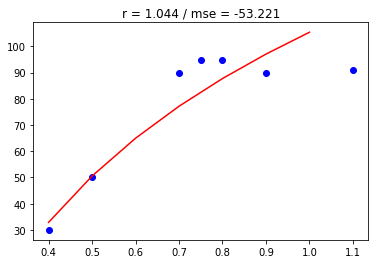

In [97]:
# linear regression: y = a + b * x
r1, mse1 = metrics(X, Y)
# logaritmic regression: y = a + b * log(x)
r2, mse2 = metrics(np.log(X), Y)
# exponential regression: y = a * exp(b * x)
r3, mse3 = metrics(X, np.log(Y))



# display
print("linear: r = %.3f / mse = %.3f"%(r1, mse1))
print("log:    r = %.3f / mse = %.3f"%(r2, mse2))
print("exp:    r = %.3f / mse = %.3f"%(r3, mse3))
# minimum error
min_mse = np.min([mse1, mse2, mse3])
# select best fit
if min_mse == mse1:
    # estimate coefficients
    a, b = coefficients(X, Y)
    # equation
    seq = "y = %.3f + %.3f * x "%(a, b)
    reg = lambda x: a + b * x 
    # metrics
    r, mse = r1, mse1
elif min_mse == mse2:
    # estimate coefficients
    a, b = coefficients(np.log(X), Y)
    # equation
    seq = "y = %.3f + %.3f * log(x) "%(a, b)
    reg = lambda x: a + b * np.log(x)
    # metrics
    r, mse = r2, mse2
    
elif min_mse == mse3:
    # estimate coefficients
    a, b = coefficients(X, np.log(Y))
    a = np.exp(a)
    # equation
    seq = "y = %.3f * exp( %.3f * x ) "%(a, b)
    reg = lambda x: a * np.exp(b * x)
    # metrics
    r, mse = r3, mse3
else:
    seq = ""
    r, mse = np.nan, np.nan
    
# display
print(seq)
print("r = %.3f / mse = %.3f"%(r, mse))

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X,Y, color = "blue")
xi = np.arange(np.min(X),np.max(X),0.1)
yi = reg(xi)
ax.plot(xi, yi, color = "red")
ax.set_title("r = %.3f / mse = %.3f"%(r, mse))
plt.show()